# High Dimensional Data Analysis Day 1

# What Just Happened !?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.



# 2d PCA example - get orientation/intuition.

1. show two variables
1. show PCA result
1. intuition is rotated axes
1. each new axis is a % of other axes now.
1. you can scale that to n dimensions.

keep detail of PCA minimized below - keep them in here. those 5 steps won't build extra intuition though.

# relationship between two variables x and y

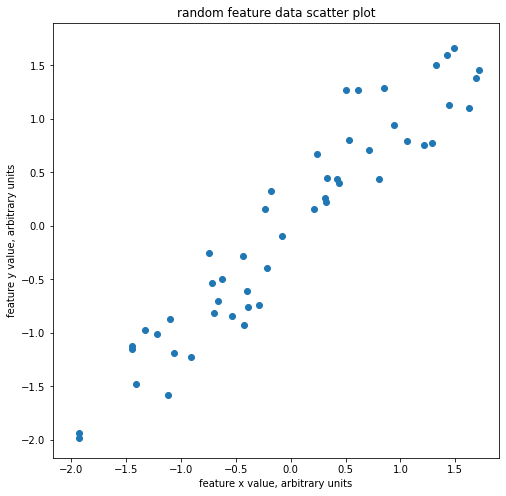

In [34]:
# Here is a random data feature, re-run until you like it:
from helper_functions import create_feature_scatter_plot
feature_ax, features, axlims = create_feature_scatter_plot()

# PCA of those two variables 

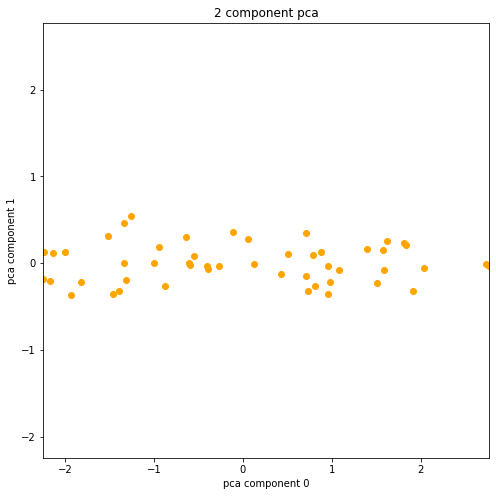

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from helper_functions import plot_pca_features

p = PCA(n_components=2)  # instantiate PCA transform
features_pca = p.fit_transform(features)  # perform PCA and re-project data 
fig, ax, (ax_min, ax_max) = plot_pca_features(features_pca)
plt.show()


# original and PCA result super imposed

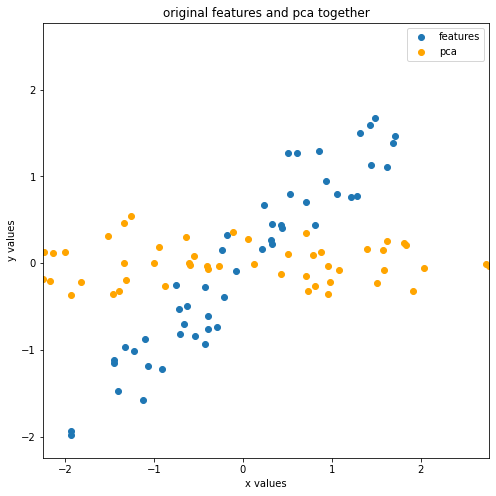

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(features[:,0], features[:,1], label='features')
ax.scatter(features_pca[:,0], features_pca[:,1], label='pca', color='orange')
ax.legend()
ax.set_title('original features and pca together')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_xlim(ax_min, ax_max)
ax.set_ylim(ax_min, ax_max)
plt.show()


## this rotation of the axes, mean that new pca axes are made up of *proportions* of the old axes

In [ ]:
p.

## this is called a dimensionality REDUCTION technique, because one dimension now explains more of the variability of your data

In [ ]:
f = create_feature_data()
f.shape[-1]

In [ ]:
min_x = min(features[:,0])
min_idx = np.argmin(features[:, 0])
y_of_min_x = features[:,1][min_idx]
            
origin = np.array([[0, 0], [0, 0]])

fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.plot([origin[:,0], p.components_[:,0]], 
         [origin[:,1], p.components_[:,1]])
ax.scatter(features[:,0], features[:,1])

# explain this:
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

https://www.reddit.com/r/explainlikeimfive/comments/4w0qlm/eli5_principal_component_analysis/

# What is PCA?
PCA is a __DIMENSIONALITY REDUCTION METHOD__ that lets you transform many dimensions in to fewer dimesions while still retaining most of the information from the original dimenions.

Trade accuracy for simplicity

Fewer dimensions means easier to: 
1. explore
2. process
3. vizualize

but, *harder* to interpret.

Another way to think about it, we're rotating the existing axes (dimensions) to new ones that are aligned with the greatest variance ('explainability') in the data.  


# Steps of PCA
We'll use some words you might not be familiar with - hang in there it's easier than it seems.
1. __standardize__
2. __compute covariance matrix__ - ID correlations
3. __compute eigenvectors and eigenvalues__ of the covariance matrix - ID principal components
4. __create a feature vector__ to decide which prinicpal components ot keep
5. __recast the data__ along the principle component axes

# Step One: Standardize

## Why?
1. standardize continuous variables' scales, so all contribute equally to the following steps.
2. variance of initial variable matters.
    1. a: 1 - 100000
    2. b: 0-0.1
    3. PCA without standardization will have a dominate over b
    


# Standardize

## How?

_z = (value - mean) / (standard deviation)_

each value is now zero centered, standard deviation = 1

Note, each variable will retain it's original relative distribution.



In [ ]:
# Note how the axes have changed, 
# but the shape of the relative shape of the data hasn't.
helper_functions.demo_standardization('OverallQual', df)

# Step Two: Compute Covariance Matrix

1. how do our input data dimensions vary from the mean with respect to each other?
2. i.e. are they related?
3. highly correlated variables are redundant
4. The Covariance Matrix will tell us

# Compute Covariance Matrix

_p x p_ where _p_ is number of input dimensions

|  | x| y| z|
|--|--|--|--|
|x |Cov(x, x)| Cov(x, y) | Cov(x, z) |
|y |Cov(y, x)| Cov(y, y) | Cov(y, z) |
|x |Cov(y, x)| Cov(z, y) | Cov(z, z) |


_Cov(x,x) == Variance(x)_ the diagonal is each variable's variance

_Cov(x,y) == Cov(y,x)_ the matrix is symmetrical around the diagonal

positive covariance = correlated
negative covariance = inversely correlated

# Covariance formula for reference
Cov(x, y) = ∑(x<sub>i</sub>-x̄)(y<sub>j</sub>-ȳ) / n - 1


# Step Three: Compute Eigenvectors and Eigenvalues

1. linear algebra concepts needed to calculate principal components
2. principal components:
    1. new variables that are linear combinations or mixtures of initial variables
    2. these new variables/principal components are built so:
        1. they are not correlated
        2. most of the information in the original variables is in the first few new variables
        3. a 10 dim data set would give 10 possible prinicple components
        4. BUT PCA tries to put as much information as possible in the first component
        5. then as much of the remaining information as possble in the second component, and so on




plot of PC % explained variance here?

1. __There are as many PCs are variables in the data__

2. NB: these new combo variables/principle components are hard to interpret because of that linear combination.

3. think of PC as being a direction through the data that explains the maximum variance/captures the most information. 

4. more variance, more dispertion along that line, the more info there is

5. i.e. a PC is a new axis that has the best angle to see/eval the data so that differences between obs are more visible


# Finding The First Principle Component

The line through all the data with the __largest possible variance__ 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def create_feature_data() -> np.ndarray:
    X1, Y1 = make_classification(
        n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
    )

    feature_1 = [x for x, y in zip(X1, Y1) if y == 0 ]  
    return np.stack(feature_1)


def scatter_plot_with_1_deg_poly_fit(feature_1: np.ndarray,
                                     axlims: Tuple[float, float]=None
                                    ) -> plt.Figure:
    plt.figure(figsize=(8, 8))
    plt.title("Random data w/ 1 degree polynomial fit")

    poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)

    plt.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k", label='random data')
    plt.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    plt.legend()
    plt.xlim(axlims)
    plt.ylim(axlims)
    return plt.Figure


def scatter_plot_with_projection(feature_1: np.ndarray,
                                 poly: np.polynomial.Polynomial = None,
                                 ax:plt.Axes = None,
                                 axlims: Tuple[float, float] = None
                                 ) -> plt.Axes:
    
    # fig, ax = plt.subplots(1,1, figsize=(8,8))
    if ax is None:
        ax=plt.gca()
    ax.set_title("Random data w/ projections to 1st degree polynomial fit")

    # create pc line and data projections on to that line
    if not poly:
        poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)
    proj_points = all_points_projection(feature_1, poly)
    
    # draw lines between data points and projection points
    lines = [[(f[0], f[1]), (p[0], p[1])] for f, p in zip(feature_1, proj_points)]
    lc = mpl.collections.LineCollection(lines, color='orange')


    # plot data, poly fit, and lines from data to projection on poly fit
    ax.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k")
    ax.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    ax.add_collection(lc)
    
    if axlims:
        ax.set_ylim(axlims)
        ax.set_xlim(axlims)
    
    # force plot to be square
    plt.ylim(plt.xlim())

    return ax


def ClosestPointOnLine(p, poly):
    a = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    b = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    print(f'{p=}, {a=}, {b=}')
    
    ap = p-a
    ab = b-a
    result = a + np.dot(ap,ab)/np.dot(ab,ab) * ab
    return result


def projection(p3: Tuple[float, float], poly: np.polynomial.Polynomial):
    """return projected point of p3 onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max()
    min_x = np.min()
    p1 = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    p2 = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    # confirm points from poly being used for projection
    plt.scatter([p1[0], p2[0]],
                [p1[1], p2[1]],
                marker='o', edgecolor='k',
                c='red')

    
    # caluclate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')
    

    # calculate t (angent?)
    t = np.sum((p3 - p1) * (p2 - p1)) / l2
                   
    if t > 1 or t < 0:
        print('p3 does not project onto p1-p2 line segment')
        
    # calculate point projected on to poly-fit           
    proj = p1 + t * (p2 - p1)   
        
    return proj


def all_points_projection(data: np.ndarray, 
                          poly: np.polynomial.Polynomial) -> np.ndarray:
    """return projected points of all points in 'data' onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max(data[:,0])
    min_x = np.min(data[:,0])
    p1 = np.array([min_x, poly(min_x)])
    p2 = np.array([max_x, poly(max_x)])
    
    # calculate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')

    proj_points = []
    for p3 in data:
        # TODO: vectorize
        # calculate t
        t = np.sum((p3 - p1) * (p2 - p1)) / l2

        if t > 1 or t < 0:
            print('p3 does not project onto p1-p2 line segment')

        # calculate point projected on to poly-fit           
        proj = p1 + t * (p2 - p1)   
        proj_points.append(proj)

    return np.vstack(proj_points)

In [ ]:
# Here is a random data feature, re-run until you like it:
def create_feature_scatter_plot() -> Tuple[np.ndarray, Tuple[float, float]]:
    feature_data = create_feature_data()
    fig, ax = plt.subplots(1,1, figsize=(8, 8))
    plt.scatter(feature_data[:,0], feature_data[:,1])
    # ensure square plot
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    min_ax_val = min(xlims[0], ylims[0])
    max_ax_val = max(xlims[1], ylims[1])
    ax.set_xlim(min_ax_val, max_ax_val)
    ax.set_ylim(min_ax_val, max_ax_val)
    # label and plot
    ax.set_title('random feature data scatter plot')
    ax.set_xlabel('feature x value, arbitrary units')
    ax.set_ylabel('feature y value, arbitrary units')
    plt.show()
    return feature_data, (min_ax_val, max_ax_val)

feature, axlims = create_feature_scatter_plot()

### What is the line of best fit through this data?

In [ ]:
ax = scatter_plot_with_1_deg_poly_fit(feature, axlims)

## How do we know this line has the most variance?

1. if you project each data point on to that line of best fit
2. then the sum of the distances of those projected points to the center of the line is the variance.
3. more distance, more variance.
4. most distance, most variance.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax = 
ax = scatter_plot_with_projection(feature, ax=ax, axlims=axlims)
plt.show()

In [ ]:
poly = np.polynomial.Polynomial.fit(feature[:, 0], feature[:, 1], deg=1)
m, b = poly.coef
# ortho_poly = np.polynomial.Polynomial.fit(feature[:, 0], 
#                                           feature[:, 0] * -m + b*2, 
#                                   deg=1)

def new_line(m, x, b) -> float:
    return m * x + b

def orthogonal_line(feature, slope) -> Tuple[List[float], List[float]]: 
    perpendicular_slope = -(1/slope)
    x_center_point = sum(feature[:, 0]) / len(feature[:, 0])
    y_center_point = sum(feature[:, 1]) / len(feature[:, 1])
    constant = y_center_point - (perpendicular_slope * x_center_point)

    max_x = max(feature[:, 0])
    max_y = perpendicular_slope * max_x + constant
    min_x = min(feature[:, 0])
    min_y = perpendicular_slope * min_x + constant
    return [min_x, max_x], [min_y, max_y]

ortho_x, ortho_y = orthogonal_line(feature, m)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
scatter_plot_with_projection(feature, ax=ax)
ax.plot(ortho_x, ortho_y, color='green')
#scatter_plot_with_projection(feature, poly=ortho_poly, ax=ax)
plt.show()


The line through all the data with the __largest possible variance__ 

i.e. the average of the squared distances from the projected points to the origin.

The second PC is found in the same way 
    - with the condition that it is perpendicular to the first PC
   
Keep going in that was till # PCs = # dimensions/variables


## eigenvectors and eigenvalues
alwyas come in pairs - every eigenvector has an eigen value
one for every dimension
10 dimensions, 10 eigenvectors with 10 eigen values.

the eigenvectors for the covariance matrix are the directions of the axes where there is the most variance, i.e. a Principle Component. An eigenvalue is a coefficient attached to an eigenvector - the amount of variance in each principle component

rank eigenvectors by eigenvalues and you get PCs in order of significance.

% of variance caluclated by eigenvalue/sum(eigenvalues)

## Feature vector
choose which PCs to keep (discard low eigenvalue PCs)
form a matrix of vectors with the PCs you keep: the feature vector.

a matrix w/ columns == eigenvectors of the kept PCs.

dimensionality reduction is happening here

fewer kepts PCs means feature dimensions.

lose that % of information (hopefully small), but get reduced complexity


## Recast the Data
Recast the data along the principle component axes
to this point no change in the data (unless you count the standardization)
now use the feature vector to reorient the data
    from original axes to the ones represented by the PCs
achieve this by multiplying the the transpose of the original dataset
with the transpose of the feature vector

final_dataset = feature_vector<sup>T</sup> * standardized_original_dataset<sup>T</sup>

In [ ]:
# let's walk back through our example now to show what happened.

In [ ]:
from sklearn.decomposition import PCA
p = PCA(n_components=len(X.columns.tolist()))
p.fit(X)

In [ ]:
def plot_eigenvectors(p: sklearn.decomposition._pca.PCA) -> Tuple[plt.Figure, plt.Axes]:
    print(f'{p.components_.shape=}')
    fig, ax = plt.subplots(1,1)
    im = ax.pcolormesh(abs(p.components_.T), norm=mpl.colors.LogNorm(vmin=1e-6))
    ax.set_title('heat map of absolute values of PCA eigenvectors')
    ax.set_ylabel('eigenvector value')
    ax.set_xlabel('eigenvector')
    plt.colorbar(im)
    return plt.Figure, plt.Axes

In [ ]:
plot_eigenvectors(p)
plt.show()

In [ ]:
p = PCA(n_components=2)
p.fit(X)

In [ ]:
plot_eigenvectors(p)
plt.show()
# make sure fit doesn't have target value in it!!
# ensure column names are what you want
# don't fit on non-numerics, non-nans
# plot out eigenvector plots w/ column names (for top x variables...)
# point out properties of the plot:
# What is each vector highlighting?
# many small values - many variables are correlated
# see if stronger vals correlate with top 30 / bottom 30 analysis.

In [ ]:
cols_i_care_about = [x for x in numeric_cols if x not in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice', 'hue']]
for v in p.components_:
    v = abs(v)
    max_v = max(v)
    idx = v.tolist().index(max_v)
    print(max_v, idx, cols_i_care_about[idx])

In [ ]:
for i, x in enumerate(df.columns.tolist()):
    print(i, x)

In [ ]:
# eigenvectors (what is being used to transform the data)
import matplotlib as mpl


plot_eigenvectors(p)
plt.show()


In [ ]:
components = p.transform(X)
components.shape

In [ ]:
# WHAT JUST HAPPENED?

# what did PCA just do?

# (it's not magic)

In [ ]:
# plot explained_variance_ratio - how well do the two components explain variance?
component_df = pd.DataFrame(
    {
        'pc0':p.explained_variance_ratio_[0],
        'pc1':p.explained_variance_ratio_[1]
    },
    index=[0]
)

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=component_df, ax=ax)
ax.set_title("bar plot of principal components' explained variance ratios")
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()

In [ ]:
# what do those two components look like?
# plot the components PC0 and PC1 as a two category histogram

with mpl.rc_context({'font.size': 14}):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.histplot(pd.DataFrame(components,
                              columns=['pc0','pc1']),
                              bins=100,
                              ax=ax,
                              palette=sns.color_palette('Accent')[:2])
    ax.set_xlabel('component value')
    plt.xticks(rotation='45', ha='right')
    plt.show()


In [ ]:
# Wrap up section
what discussed today:
    1.
    2.
    3.

# OLD - Breast Cancer Data look at a high dimensional dataset

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
print(f'data set data type: {type(data)}')
print()
print(f'data set options: {dir(data)}')
print()
print([k for k in data.keys()])


In [ ]:
# loaed data
# now explore it - hint functions
# what can you discover?
# if yowuanted to PCA this data, what would you need to know?

# put code in lesson structure
# add in text/markdown between to fill out lesson structure around code

In [ ]:
print(data.DESCR)

## conceptual exercise
what is this dataset? what questions can be answered? what stories can be told? what limitations are there? EDA MOMENT

## how to understand this data?

In [ ]:
df = pd.DataFrame(data.data)
df

In [ ]:
df = df.set_axis(data.feature_names, axis=1)
df

In [ ]:
numeric_cols = df.describe().columns.tolist()
df.describe()

In [ ]:
# put benign/malignant label into the data frame from the bunch object
df['labels'] = data.target

In [ ]:
df['labels'].describe()

In [ ]:
# TODO: consider sns heatmap

cm = df.corr()
# cm.Styler.format(precision=2)
cm.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
cm['labels'][:-1].plot.bar()
plt.show()

In [ ]:
# cols=['labels','worst concave points']
# LABEL THIS PLOT!!!! change x axis to 0 or 1.
plt.scatter(df['labels'],
            df['worst concave points'],
            s=10,
            alpha=0.6)
plt.show()

In [ ]:
# TODO: pick the best columns
import seaborn as sns
cols = df.columns.tolist()
sns.pairplot(
    df[
        cols[:10]+['labels']
    ],
    hue='labels',
    plot_kws={'alpha': 0.3}
)
plt.show()

In [ ]:
cols_no_label = df.columns[:-1]
X = df[cols_no_label]

In [ ]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
components = p.fit_transform(X)

In [ ]:
#  plot the components PC0 and PC1 as a two category histogram
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.histplot(pd.DataFrame(components,
                          columns=['pc0','pc1']),
                          bins=100,
                          ax=ax,
                          palette=sns.color_palette('Accent')[:2])
plt.show()


In [ ]:
p.explained_variance_ratio_

In [ ]:
# Can you plot the cumulative variance?
# which component is the most important?
component_df = pd.DataFrame({'pc0':p.explained_variance_ratio_[0], 'pc1':p.explained_variance_ratio_[1]}, index=[0])
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=component_df)
plt.show()

In [ ]:
def provided_plotting_function(components):
    x = components[:,0]
    y = components[:,1]
    fig = plt.figure(figsize=(8,6))
    s = 10
    alpha = .6
    labels  = df['labels'].tolist()
    colors = ['lightblue','orange']
    plt.scatter(x,y,
                s=s,
                c=labels,
                cmap=mpl.colors.ListedColormap(colors),
                alpha=alpha)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
    cb = plt.colorbar()
    loc = np.arange(0, 2, 1)
    cb.set_ticks(loc)
    plt.show()

In [ ]:
pca_df = pd.DataFrame(components, columns=[1,2])
pca_df['labels'] = df['labels']
df_0 = pca_df[pca_df['labels']==0]
df_1 = pca_df[pca_df['labels']==1]

In [ ]:
fig = plt.figure(figsize=(7,7))
labels  = df['labels'].tolist()
s = 10
alpha = 1
plt.scatter(df_0[1], df_0[2], s=s, label = '0', c='lightblue', alpha=alpha, zorder=2)
plt.scatter(df_1[1], df_1[2], s=s, label = '1', c='orange', alpha=alpha, zorder=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
plt.legend()
plt.show()

In [ ]:
# biplot
# component 1 relates most to what original feature?

## HOW DOES PCA WORK DISCUSSION

# Concrete Exercises

In [ ]:
# create synthetic 2D data
X, y = datasets.make_blobs(n_samples=150, # total number of points, split per center
                           n_features=2,  # number of dimensions for the data
                           centers=2,     # number of blobs in the data
                           cluster_std=4,
                           random_state=1)

In [ ]:
np.unique(y)

In [ ]:
# visualize synthetic data
colors = ['lightblue','orange']
plt.scatter(X[:,0], X[:,1],
            c=y,
            # labels = [0,1], # np.unique(y),
            cmap=mpl.colors.ListedColormap(colors) )
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [ ]:
# perform PCA on synthetic data
from sklearn.decomposition import PCA
p = PCA(n_components=2)
components = p.fit_transform(X)
for feature in p.explained_variance_ratio_:
    print(feature)

In [ ]:
# plot PCA result
feature_1 = components[:,0]
feature_2 = components[:,1]
fig = plt.figure(figsize=(8,6))
s = 50
alpha = 1
# labels  = df['labels'].tolist()
colors = ['lightblue','orange']
plt.scatter(feature_1, feature_2,
            s=s,
            c=y,
            cmap=mpl.colors.ListedColormap(colors),
            alpha=alpha)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Fake dataset 2 component PCA')
cb = plt.colorbar()
loc = np.arange(0, 2, 1)
cb.set_ticks(loc)
plt.show()

PCA discussion:
https://setosa.io/ev/principal-component-analysis/

In [ ]:
# bring up draw backs to using PCA also (esp in modelling context)
# interpretability!

maybe missign a 2d toy example where all you do is rotate

how to connext 30 space

some basic thing about coordiante systems and changes og coordaintes - don't have to use those words
need to have some feelin about what that is

use beginnging o video: ANALOGY
https://www.youtube.com/watch?v=BorcaCtjmog

    Then go to the three blobs vis https://setosa.io/ev/principal-component-analysis/


Steve: points on a number line (pca)

second variable, first large, econd small, still seems mostly 1d. (pca gets pc 1)

rotate to 45 deg line - pc are just change of variables - rotation

concept to add here
    what about not just spinning the axes

do the parson's penguins -downlaod nad run.



In [ ]:
sin_fn()


In [ ]:
import numpy as np

a1 = np.array([[0,0],[0,0]])
a2 = np.array([[0,0],[0,0]])

np.allclose(a1, a2)